# CS 4662: ADVANCED MACHINE LEARNING
## Jay Tandel

### Cancer Diagnosis Using Machine Learning

## 1

Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame:

df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign   tumor). You will use all 9 features in this homework.

In [1]:
# Importing the required packages and libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statistics import mode
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the csv file from web, and store it in panda DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/Cancer.csv')

#print the imported dataset
print(df)

     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
145                3                        1                         1   
146                9                        7                         7   
147               10                        8                         8   
148                1                        1                         1   
149                5                        1                         1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1         

## 2

Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [3]:
# Creating the Feature Matrix for Cancer dataset:

# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 
                'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses',]

# use the above list to select the features from the original DataFrame
X = df[feature_cols]

# select a Series of labels (the last column) from the DataFrame
y = df['Malignant_Cancer']

#spliting the data randomly into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(105, 9)
(105,)
(45, 9)
(45,)


## 3

Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). Then, calculate and report the accuracy and AUC of your classifier. Later in part (g), you will plot the ROC curve as well. Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [4]:
#defining decision tree object
my_DecisionTree = DecisionTreeClassifier(random_state=2)

#train data using decision tree object
my_DecisionTree.fit(X_train, y_train)

#predict test data
y_predict = my_DecisionTree.predict(X_test)

#check accuracy
accuracy_log = accuracy_score(y_test,y_predict)
print(accuracy_log)

0.8666666666666667


In [5]:
# Predicting the Binary Label:
y_predict = my_DecisionTree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = my_DecisionTree.predict_proba(X_test)

In [6]:
# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


In [7]:
# Takes in False Positive Rate(fpr) and True Positive rate(tpr)
#auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC: ',AUC)

AUC:  0.8697478991596639


## 4

Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.

Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0…18.  In each iteration of the loop, you have to:

make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size of bootstarp_size = 0.8*(Size of the original dataset). You can use the following command to generate a random bootstrap dataset (“i" is the variable of the loop, so the random_state changes in each iteration):
resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)

Define and train a new base decision tree classifier on this dataset in each iteration:
Base_DecisionTree = DecisionTreeClassifier(random_state=2).

Test “this base classifier” on the original “Testing” Dataset build in part(b), and save the prediction results for all testing samples.

In [8]:
bootstarp_size = int(0.8 * X_train.shape[0])
#create empty list
BDTsamples = []

for i in range(29):
    X,y = resample(X_train, y_train, n_samples = bootstarp_size, random_state = i, replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state = 2)
    Base_DecisionTree.fit(X,y)
    #testing Base_DecisionTree on orginial testing set
    Base_DecisionTree_predict = Base_DecisionTree.predict(X_test)
    #storing predicitons in list
    BDTsamples.append(Base_DecisionTree_predict)

In [9]:
#creating empty list to for voting
majority = []

Base_Tree = pd.DataFrame(BDTsamples).T
column_list = list(Base_Tree)
Base_Tree["sum"] = Base_Tree[column_list].sum(axis=1).T
sum_list = Base_Tree["sum"].T.tolist()
#print(Base_Tree["sum"])

p_list = np.array(BDTsamples)
predictions_t = p_list.T

#print(sum_list_temp)
for i in predictions_t:
    temp = mode(i)
    majority.append(temp)

#print(majority)        

#calculate accuracy score of majority list
majority_DT_accuracy = accuracy_score(y_test, majority)
print("Voting accuracy: ", majority_DT_accuracy)

Voting accuracy:  0.9111111111111111


In [10]:
#create empty list for average of votes
avgPredictions = []
#iterate through list of row sums and divide by length of list for average
for i in sum_list:
    avg = i / len(Base_Tree[0])
    avgPredictions.append(avg)
    
#print(avgPredictions)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, avgPredictions, pos_label=1)

voting_AUC = metrics.auc(fpr2,tpr2)
print("\nVoting AUC: ", voting_AUC)


Voting AUC:  0.9380252100840336


## 5

Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

from   sklearn.ensemble   import     AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [11]:
my_AdaBoost = AdaBoostClassifier(n_estimators=29,random_state=2)
my_AdaBoost.fit(X_train,y_train)
my_AdaBoost_predict = my_AdaBoost.predict(X_test)
my_AdaBoost_predict_prob = my_AdaBoost.predict_proba(X_test)
AdaBoost_accuracy = accuracy_score(y_test, my_AdaBoost_predict)
print("AdaBoost accuracy: ", AdaBoost_accuracy)

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, my_AdaBoost_predict_prob[:,1], pos_label=1)
ada_AUC = metrics.auc(fpr3, tpr3)
print("\nAdaBoost AUC: ", ada_AUC)

AdaBoost accuracy:  0.9555555555555556

AdaBoost AUC:  0.9653361344537815


## 6

n this section, we use an extremely popular Boosting algorithm called “XGBoost”. This algorithm is not included in sklearn, so you need to install the XGBoost library. Please see this for more infor: https://xgboost.readthedocs.io/en/latest/build.html (Links to an external site.)

Mac users can easily install it with “pip install xgboost”.

Repeat part (e) with XGBoost. Use this command to import and define your classifier:

from   xgboost   import   XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [12]:
#import xgboost

In [13]:
#import sys
#!{sys.executable} -m pip install xgboost

In [14]:
#conda install -c conda-forge xgboost

In [15]:
#use_label_encoder was suggested to stop the bright red error message
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators=29,random_state=2,use_label_encoder=False)
my_XGBoost.fit(X_train,y_train)
my_XGBoost_predict = my_XGBoost.predict(X_test)
my_XGBoost_predict_prob = my_XGBoost.predict_proba(X_test)
XBG_accuracy = accuracy_score(y_test, my_XGBoost_predict)
print("XGB accuracy: ",XBG_accuracy)

fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, my_XGBoost_predict_prob[:,1],pos_label=1)
XGB_AUC = metrics.auc(fpr4,tpr4)
print("\nXGB AUC: ", XGB_AUC)

[11:05:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB accuracy:  0.9555555555555556

XGB AUC:  0.9716386554621849


## 7

Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)



In [16]:
my_RandomForest = RandomForestClassifier(n_estimators=29,bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_predict_prob = my_RandomForest.predict_proba(X_test)
my_RandomForest_accuracy = accuracy_score(y_test, my_RandomForest_predict)
print("Random Forest accuracy: ", my_RandomForest_accuracy)

fpr5,tpr5,thresholds5 = metrics.roc_curve(y_test, my_RandomForest_predict_prob[:,1],pos_label=1)
RF_AUC = metrics.auc(fpr5,tpr5)
print("\nRandom Forest AUC: ", RF_AUC)

Random Forest accuracy:  0.9555555555555556

Random Forest AUC:  0.9516806722689075


## 8

Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

Which algorithm is the best w.r.t the AUC value?

Which algorithm is the best w.r.t the Accuracy value?

Which algorithm is the best when we want a False Positive Rate of %7?

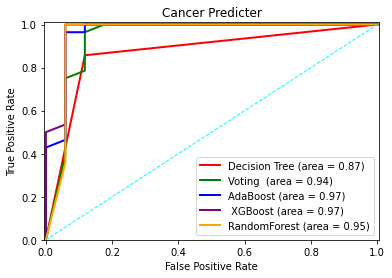

In [17]:
#keep figures inside jupyter notebook
%matplotlib inline

plt.figure()

#ROC curve
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'Decision Tree (area = %0.2f)' % AUC)
plt.plot(fpr2, tpr2, color = 'green', lw = 2, label = 'Voting  (area = %0.2f)' % voting_AUC)
plt.plot(fpr3, tpr3, color = 'blue', lw = 2, label = 'AdaBoost (area = %0.2f)' % ada_AUC)
plt.plot(fpr4, tpr4, color = 'purple', lw = 2, label = ' XGBoost (area = %0.2f)' % XGB_AUC)
plt.plot(fpr5, tpr5, color = 'orange', lw = 2, label = 'RandomForest (area = %0.2f)' % RF_AUC)

#Random Guess Line:
plt.plot([0, 1], [0, 1], color = 'cyan', lw = 1, linestyle = '--')

#Defining The Range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Predicter')
plt.legend(loc = "lower right")

plt.show()

### Which algorithm is the best w.r.t the AUC value?
#### XGBoost is best w.r.t the AUC Value
#### AUC Value: 0.9716386554621849

### Which algorithm is the best w.r.t the Accuracy value?
#### Adaboost,XGboost and Random Forest algorithm is the best w.r.t the AUC value
#### Accuracy Value : 0.9555555555555556

### Which algorithm is the best when we want a False Positive Rate of %7?
Random Forest

## Answer Summary

## 3
#### Decision Tree Classifier Accuracy: 0.8666666666666667
#### Decision Tree Classifier AUC: AUC:  0.8697478991596639

## 4
#### Bagging Accuracy: 0.9111111111111111
#### Bagging AUC: 0.9380252100840336

## 5
#### AdaBoost Accuracy:  0.9555555555555556
#### AdaBoost AUC:  0.9653361344537815


## 6
#### XGB accuracy:  0.9555555555555556
#### XGB AUC:  0.9716386554621849

## 7
#### Random Forest accuracy:  0.9555555555555556
#### Random Forest AUC:  0.9516806722689075

